In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,BatchNormalization,Dropout
from tensorflow.keras.layers import MaxPooling2D

In [2]:
train=pd.read_csv('/content/drive/My Drive/sign_mnist_train/sign_mnist_train.csv')
test=pd.read_csv('/content/drive/My Drive/sign_mnist_test/sign_mnist_test.csv')

In [3]:
x_train=np.array(train.drop(['label'],axis=1)).reshape(-1,28,28)
print(x_train.shape)
x_test=np.array(test.drop(['label'],axis=1)).reshape(-1,28,28)
print(x_test.shape)

(27455, 28, 28)
(7172, 28, 28)


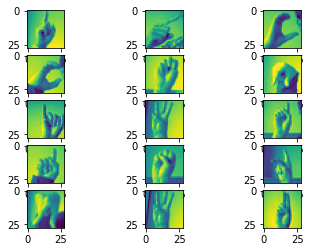

In [4]:
for i in range(15):
    plt.subplot(5,3,i+1)
    plt.imshow(x_train[i])

In [5]:
y_train=np.array(train['label'])
print(y_train.shape)
y_test=np.array(test['label'])
print(y_test.shape)

(27455,)
(7172,)


In [6]:
y_train[0]

3

In [7]:
x_train_exp=np.expand_dims(x_train,axis=3)
print(x_train_exp.shape)

x_test_exp=np.expand_dims(x_test,axis=3)
print(x_test_exp.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [8]:
train_gen=  ImageDataGenerator(rescale=1/255,
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


In [9]:
test_gen= ImageDataGenerator(rescale=1/255,
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


In [10]:
train_datagen=train_gen.flow(x=x_train_exp,y=y_train)
test_datagen=test_gen.flow(x_test_exp,y=y_test)

In [11]:
model= Sequential([
                  Conv2D(16,(3,3),input_shape=(28,28,1),activation='relu'),
                  MaxPooling2D(2,2),
                  Flatten(),
                  Dense(512,activation='relu'),
                  Dense(26,activation='softmax')
                 ])

In [13]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.fit(train_datagen,epochs=10, validation_data=test_datagen)

Epoch 1/10
858/858 [==============================] - 33s 38ms/step - loss: 2.0728 - accuracy: 0.3786 - val_loss: 1.5132 - val_accuracy: 0.5166
Epoch 2/10
858/858 [==============================] - 33s 38ms/step - loss: 1.0192 - accuracy: 0.6834 - val_loss: 1.0335 - val_accuracy: 0.6467
Epoch 3/10
858/858 [==============================] - 32s 38ms/step - loss: 0.6575 - accuracy: 0.7953 - val_loss: 0.7990 - val_accuracy: 0.7316
Epoch 4/10
858/858 [==============================] - 32s 38ms/step - loss: 0.4623 - accuracy: 0.8574 - val_loss: 0.5919 - val_accuracy: 0.7921
Epoch 5/10
858/858 [==============================] - 32s 37ms/step - loss: 0.3513 - accuracy: 0.8928 - val_loss: 0.5106 - val_accuracy: 0.8331
Epoch 6/10
858/858 [==============================] - 32s 37ms/step - loss: 0.2768 - accuracy: 0.9170 - val_loss: 0.4925 - val_accuracy: 0.8377
Epoch 7/10
858/858 [==============================] - 32s 38ms/step - loss: 0.2192 - accuracy: 0.9368 - val_loss: 0.3664 - val_accuracy:

In [15]:
model2= Sequential([
                  Conv2D(16,(3,3),input_shape=(28,28,1),activation='relu'),
                  MaxPooling2D(2,2),
                  Flatten(),
                  Dense(512,kernel_regularizer=keras.regularizers.l2(0.001)),
                  Dense(512,activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)),
                  Dense(26,activation='softmax')
                 ])